# Session 1 & 1.5: 로지스틱 회귀와 전처리 심화

## 목표
타이타닉 생존자 데이터를 이용하여 **인코딩(Encoding)**과 **스케일링(Scaling)**을 적용해보고, 로지스틱 회귀 모델로 생존자를 예측합니다.

### 1. 데이터 로드 및 결측치 처리

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 필요한 컬럼 선택 (embarked 추가)
df = titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].copy()

# 결측치 처리: 나이는 평균으로, 정박항구(embarked)는 최빈값('S')으로 채움
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna('S')
df.dropna(inplace=True)

df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


### 2. 데이터 전처리 (Preprocessing)
**Session 1.5 적용**: 인코딩과 스케일링을 수행합니다.

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. 인코딩 (Encoding)
# 성별(sex)과 항구(embarked)는 문자이므로 숫자로 변환해야 함
# 간단하게 LabelEncoder 사용 (Male=1, Female=0 등)
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

print("인코딩 후 데이터:")
print(df[['sex', 'embarked']].head())

# 2. 스케일링 (Scaling)
# 나이(0~80)와 요금(0~500)은 단위 차이가 큼 -> StandardScaler 적용
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

print("\n스케일링 후 데이터 (평균=0, 분산=1):")
print(df[['age', 'fare']].head())

인코딩 후 데이터:
   sex  embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2

스케일링 후 데이터 (평균=0, 분산=1):
        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


### 3. 데이터 분리 및 학습

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 4. 예측 및 평가

Accuracy: 0.7989


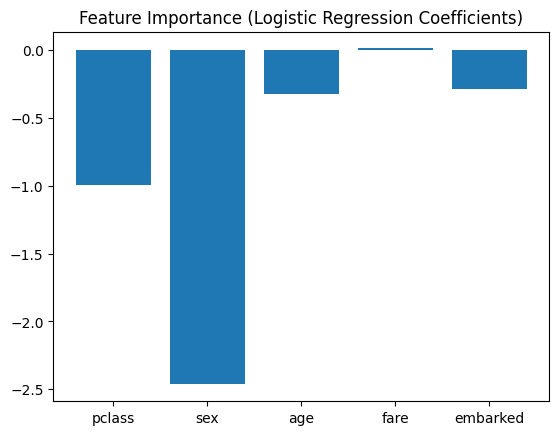

In [4]:
pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")

# 각 Feature가 생존에 미친 영향(가중치) 확인
import  matplotlib.pyplot as plt
plt.bar(X.columns, model.coef_[0])
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

## 5. 인사이트 도출 (Insights)

### 🌟 Key Takeaways
*   **분류 vs 회귀**: 정답이 숫자가 아니라 0(사망) 또는 1(생존)과 같은 범주형일 때는 회귀 대신 로지스틱 회귀(분류기)를 써야 함을 배웠습니다.
*   **시그모이드 함수**: 결과를 확률(0~1 사이)로 변환해주며, 0.5보다 크면 1, 작으면 0으로 판별하는 핵심 원리를 이해했습니다.
*   **전처리 효과**: 스케일링(StandardScaler)을 적용했을 때 모델의 학습 안정성이 높아짐을 확인했습니다.

### 🔬 Try More
*   **임계값 변경**: 생존 확률이 0.5가 아니라 0.7 이상일 때만 생존으로 예측한다면, 생존자 예측 수는 어떻게 변할까요?
